#Downloading libraries we need

In [23]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score


#Naming columns and taking a look on the head of Dataset



In [24]:
data = pd.read_csv('car.data')
data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

data.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


#Visualazing features with target looking for pattrens

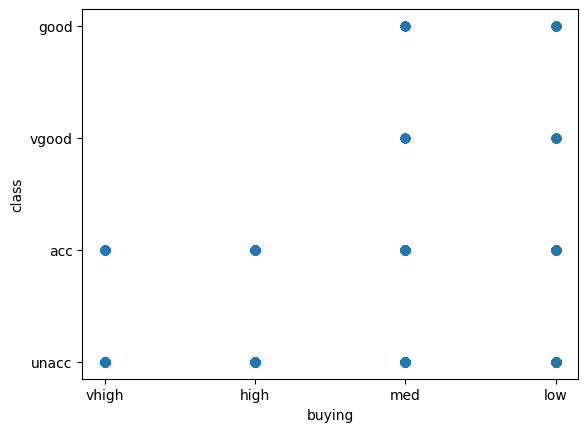

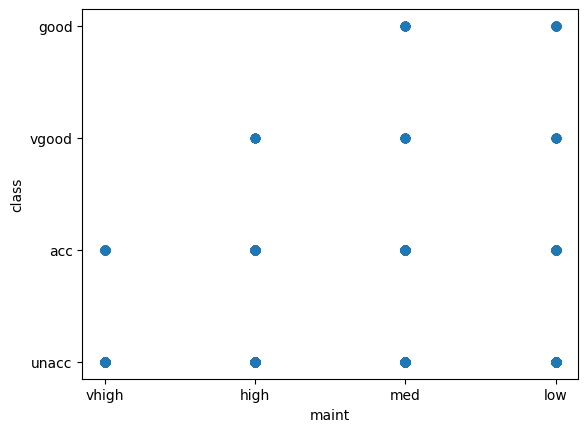

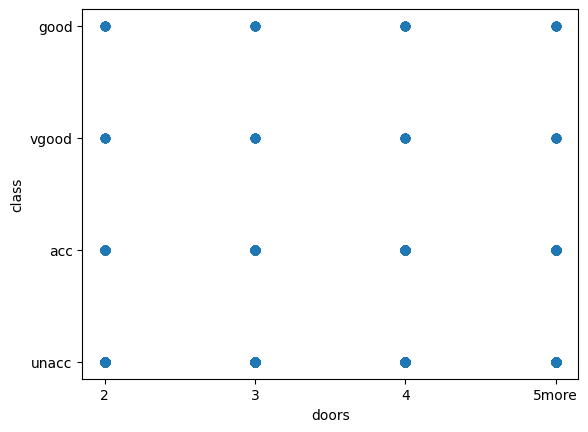

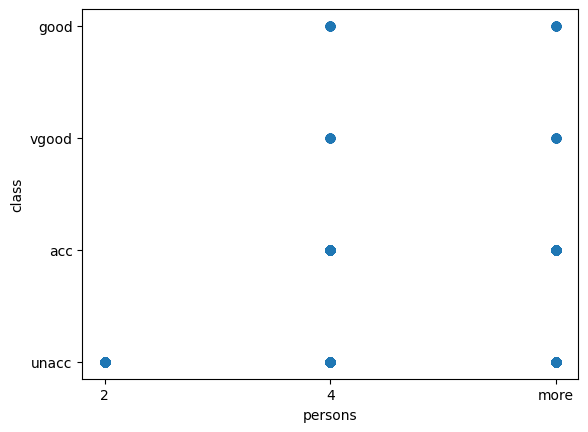

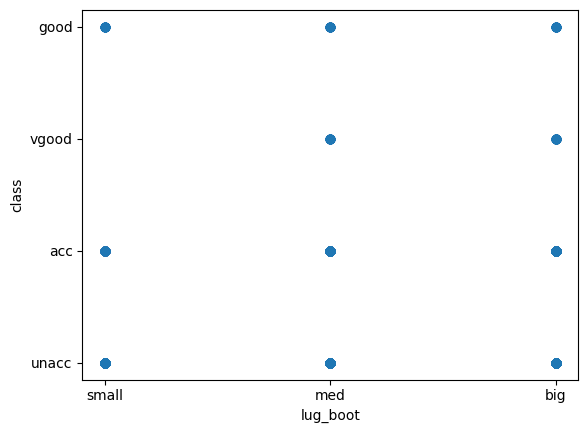

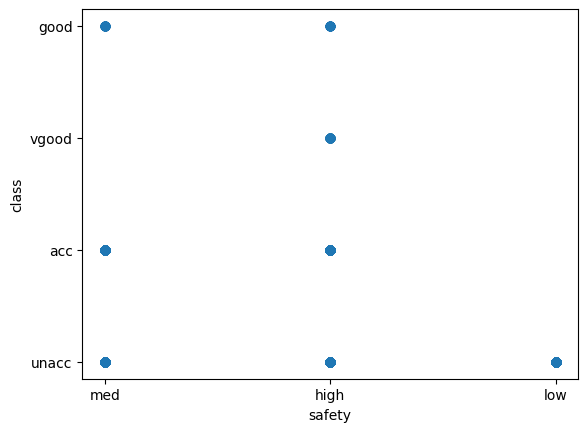

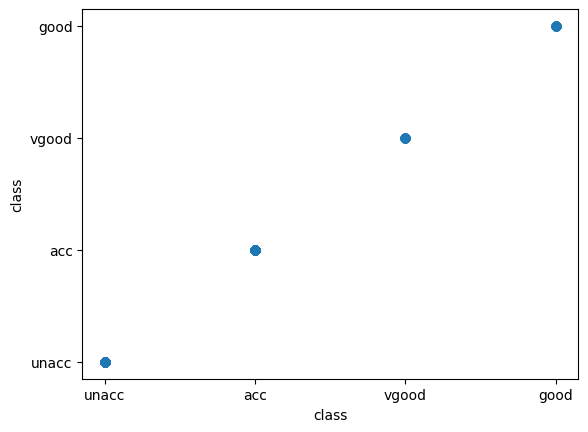

In [25]:
for col in data.columns:
    plt.scatter(data[col], data['class'])
    plt.xlabel(col)
    plt.ylabel('class')
    plt.show()

#Computer deal with numbers better than strings

In [26]:
data['buying'] = data['buying'].map({'low': 0, 'med': 1, 'high': 2, 'vhigh': 3})
data['maint'] = data['maint'].map({'low': 0, 'med': 1, 'high': 2, 'vhigh': 3})
data['doors'] = data['doors'].map({'2': 0, '3': 1, '4': 2, '5more': 3})
data['persons'] = data['persons'].map({'2': 0, '4': 1, 'more': 2})
data['lug_boot'] = data['lug_boot'].map({'small': 0, 'med': 1, 'big': 2})
data['safety'] = data['safety'].map({'low': 0, 'med': 1, 'high': 2})
data['class'] = data['class'].map({'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3})

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1727 non-null   int64
 1   maint     1727 non-null   int64
 2   doors     1727 non-null   int64
 3   persons   1727 non-null   int64
 4   lug_boot  1727 non-null   int64
 5   safety    1727 non-null   int64
 6   class     1727 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


#We split data and use the SVC without any parameter

In [28]:

X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = round(accuracy_score(y_test, y_pred) , 2)
recall = round(recall_score(y_test, y_pred, average='weighted') , 2)
precision = round(precision_score(y_test, y_pred, average='weighted') , 2)
f1 = round(f1_score(y_test, y_pred, average='weighted') , 2)
print(f'acc : {acc} , recall : {recall} , precision : {precision} , f1 : {f1}')


acc : 0.97 , recall : 0.97 , precision : 0.98 , f1 : 0.97


#Same code but with adding some prameters

In [29]:


X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = SVC(kernel='linear',C=100 ,gamma =0.01)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = round(accuracy_score(y_test, y_pred) , 2)
recall = round(recall_score(y_test, y_pred, average='weighted') , 2)
precision = round(precision_score(y_test, y_pred, average='weighted') , 2)
f1 = round(f1_score(y_test, y_pred, average='weighted') , 2)
print(f'acc : {acc} , recall : {recall} , precision : {precision} , f1 : {f1}')



acc : 0.85 , recall : 0.85 , precision : 0.85 , f1 : 0.85


#Finding the best parmeters using **GridSearchCV**

In [45]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the model
svc = SVC()

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
    'class_weight': [None, 'balanced']
}

# Set up Grid Search
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy' ,n_jobs=-1)
grid_search.fit(X_train[:500], y_train[:500])

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 10, 'class_weight': None, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}


#Comparing the accuracy after using best parameters

In [43]:

X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = SVC(kernel='rbf',C=100 ,gamma ='auto',class_weight=None , degree=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = round(accuracy_score(y_test, y_pred) , 2)
recall = round(recall_score(y_test, y_pred, average='weighted') , 2)
precision = round(precision_score(y_test, y_pred, average='weighted') , 2)
f1 = round(f1_score(y_test, y_pred, average='weighted') , 2)
print(f'acc : {acc} , recall : {recall} , precision : {precision} , f1 : {f1}')
with open('Car_evaluation.pkl', 'wb') as f:
    pickle.dump(clf, f)
print("\033[92mModel saved successfully!\033[0m")


acc : 1.0 , recall : 1.0 , precision : 1.0 , f1 : 1.0
Model saved successfully!
